This study looks at the prevalence of asthma in the U.S. and in two additional states shown to have a high prevalence. The U.S. data comes from the U.S. Centers for Disease Control and Prevention. The dataset is the U.S. Chronic Disease Indicators: Asthma.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import mapclassify
%matplotlib inline

### Load asthma dataset and perform exploratory data analysis

In [2]:
asthma = pd.read_csv('C:\\Users\\Mary\\CIS5898\\FIT_capstone\\Original_datasets\\U.S._Chronic_Disease_Indicators__Asthma (1).csv') 
print(asthma.info()) #provides basic information on data
print(asthma.ndim) #provides dimensions
print(asthma.shape) #provides number of rows and number of columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64719 entries, 0 to 64718
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YearStart                  64719 non-null  int64  
 1   YearEnd                    64719 non-null  int64  
 2   LocationAbbr               64719 non-null  object 
 3   LocationDesc               64719 non-null  object 
 4   DataSource                 64719 non-null  object 
 5   Topic                      64719 non-null  object 
 6   Question                   64719 non-null  object 
 7   Response                   0 non-null      float64
 8   DataValueUnit              57171 non-null  object 
 9   DataValueType              64719 non-null  object 
 10  DataValue                  32185 non-null  float64
 11  DataValueAlt               32185 non-null  float64
 12  DataValueFootnoteSymbol    33660 non-null  object 
 13  DatavalueFootnote          33660 non-null  obj

In [3]:
asthma['YearStart'].unique()

array([2012, 2014, 2011, 2015, 2013, 2017, 2010, 2016, 2019, 2018],
      dtype=int64)

In [4]:
#2012 is the sole year in the dataset that matches a year in the air quality studies. Limit dataset to 2012.
asthma2012 = asthma[asthma['YearStart']==2012].sort_values('LocationAbbr')
print(len(asthma2012))
asthma2012.head(5)

5902


,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
49980,2012,2012,AK,Alaska,BRFSS,Asthma,Pneumococcal vaccination among noninstitutiona...,NaN,%,Age-adjusted Prevalence,...,2,AST,AST6_1,AGEADJPREV,RACE,MRC,NaN,NaN,NaN,NaN
2901,2012,2012,AK,Alaska,NVSS,Asthma,Asthma mortality rate,NaN,"cases per 1,000,000",Crude Rate,...,2,AST,AST4_1,CRDRATE,OVERALL,OVR,NaN,NaN,NaN,NaN
46531,2012,2012,AK,Alaska,BRFSS,Asthma,Influenza vaccination among noninstitutionaliz...,NaN,%,Crude Prevalence,...,2,AST,AST5_2,CRDPREV,RACE,HIS,NaN,NaN,NaN,NaN
37486,2012,2012,AK,Alaska,BRFSS,Asthma,Asthma prevalence among women aged 18-44 years,NaN,%,Crude Prevalence,...,2,AST,AST1_2,CRDPREV,RACE,OTH,NaN,NaN,NaN,NaN
36772,2012,2012,AK,Alaska,BRFSS,Asthma,Influenza vaccination among noninstitutionaliz...,NaN,%,Crude Prevalence,...,2,AST,AST5_1,CRDPREV,GENDER,GENM,NaN,NaN,NaN,NaN


In [5]:
#find which states are represented
asthma2012['LocationDesc'].unique()


array(['Alaska', 'Alabama', 'Arkansas', 'Arizona', 'California',
       'Colorado', 'Connecticut', 'District of Columbia', 'Delaware',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Iowa', 'Idaho',
       'Illinois', 'Indiana', 'Kansas', 'Kentucky', 'Louisiana',
       'Massachusetts', 'Maryland', 'Maine', 'Michigan', 'Minnesota',
       'Missouri', 'Mississippi', 'Montana', 'North Carolina',
       'North Dakota', 'Nebraska', 'New Hampshire', 'New Jersey',
       'New Mexico', 'Nevada', 'New York', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'United States', 'Utah',
       'Virginia', 'Virgin Islands', 'Vermont', 'Washington', 'Wisconsin',
       'West Virginia', 'Wyoming'], dtype=object)

### Clean dataset

In [6]:
#drop District of Columbia, Guam, Puerto Rico, Virgin Islands, and United States
asthma2012States = asthma2012[(asthma2012['LocationDesc']!= 'District of Columbia') 
                & (asthma2012['LocationDesc']!='Guam')
                & (asthma2012['LocationDesc']!='Puerto Rico') 
                & (asthma2012['LocationDesc']!='United States')               
                & (asthma2012['LocationDesc']!='Virgin Islands') ]
asthma2012States.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
49980,2012,2012,AK,Alaska,BRFSS,Asthma,Pneumococcal vaccination among noninstitutiona...,NaN,%,Age-adjusted Prevalence,...,2,AST,AST6_1,AGEADJPREV,RACE,MRC,NaN,NaN,NaN,NaN
2901,2012,2012,AK,Alaska,NVSS,Asthma,Asthma mortality rate,NaN,"cases per 1,000,000",Crude Rate,...,2,AST,AST4_1,CRDRATE,OVERALL,OVR,NaN,NaN,NaN,NaN
46531,2012,2012,AK,Alaska,BRFSS,Asthma,Influenza vaccination among noninstitutionaliz...,NaN,%,Crude Prevalence,...,2,AST,AST5_2,CRDPREV,RACE,HIS,NaN,NaN,NaN,NaN
37486,2012,2012,AK,Alaska,BRFSS,Asthma,Asthma prevalence among women aged 18-44 years,NaN,%,Crude Prevalence,...,2,AST,AST1_2,CRDPREV,RACE,OTH,NaN,NaN,NaN,NaN
36772,2012,2012,AK,Alaska,BRFSS,Asthma,Influenza vaccination among noninstitutionaliz...,NaN,%,Crude Prevalence,...,2,AST,AST5_1,CRDPREV,GENDER,GENM,NaN,NaN,NaN,NaN


In [7]:
#find questions
asthma2012States['Question'].unique()

array(['Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with asthma',
       'Asthma mortality rate',
       'Influenza vaccination among noninstitutionalized adults aged >= 65 years with asthma',
       'Asthma prevalence among women aged 18-44 years',
       'Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma',
       'Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with asthma',
       'Current asthma prevalence among adults aged >= 18 years'],
      dtype=object)

In [8]:
#the question of interest is the current asthma prevalence among adults aged >=18 years
asthma2012CurrentAsthmaPrevalence = asthma2012States[(asthma2012States['Question']
        =='Current asthma prevalence among adults aged >= 18 years')]
print(len(asthma2012CurrentAsthmaPrevalence))
asthma2012CurrentAsthmaPrevalence.head()

800


,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
23452,2012,2012,AK,Alaska,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,...,2,AST,AST1_1,CRDPREV,GENDER,GENM,NaN,NaN,NaN,NaN
23207,2012,2012,AK,Alaska,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Age-adjusted Prevalence,...,2,AST,AST1_1,AGEADJPREV,RACE,OTH,NaN,NaN,NaN,NaN
23193,2012,2012,AK,Alaska,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,...,2,AST,AST1_1,CRDPREV,GENDER,GENF,NaN,NaN,NaN,NaN
23161,2012,2012,AK,Alaska,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,...,2,AST,AST1_1,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
23149,2012,2012,AK,Alaska,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Age-adjusted Prevalence,...,2,AST,AST1_1,AGEADJPREV,RACE,BLK,NaN,NaN,NaN,NaN


In [9]:
#overall prevalence (not stratified by gender or race) is the column of interest for stratification category
#limit the dataset to overall prevalence
asthma2012CAPOverall = asthma2012CurrentAsthmaPrevalence[asthma2012CurrentAsthmaPrevalence['StratificationCategoryID1'] 
                        == 'OVERALL']
asthma2012CAPOverall.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
23161,2012,2012,AK,Alaska,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,...,2,AST,AST1_1,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
22895,2012,2012,AK,Alaska,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Age-adjusted Prevalence,...,2,AST,AST1_1,AGEADJPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
23239,2012,2012,AL,Alabama,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Age-adjusted Prevalence,...,1,AST,AST1_1,AGEADJPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
23038,2012,2012,AL,Alabama,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,...,1,AST,AST1_1,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
22988,2012,2012,AR,Arkansas,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,...,5,AST,AST1_1,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN


In [10]:
asthma2012CAPOverall.iloc[0:10, 0:18]

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1
23161,2012,2012,AK,Alaska,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,9.0,9.0,NaN,NaN,7.9,10.3,Overall,Overall
22895,2012,2012,AK,Alaska,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Age-adjusted Prevalence,9.1,9.1,NaN,NaN,7.9,10.3,Overall,Overall
23239,2012,2012,AL,Alabama,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Age-adjusted Prevalence,8.5,8.5,NaN,NaN,7.7,9.5,Overall,Overall
23038,2012,2012,AL,Alabama,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,8.6,8.6,NaN,NaN,7.8,9.5,Overall,Overall
22988,2012,2012,AR,Arkansas,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,8.8,8.8,NaN,NaN,7.8,9.8,Overall,Overall
23253,2012,2012,AR,Arkansas,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Age-adjusted Prevalence,8.7,8.7,NaN,NaN,7.6,9.8,Overall,Overall
23310,2012,2012,AZ,Arizona,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Age-adjusted Prevalence,8.7,8.7,NaN,NaN,7.7,9.8,Overall,Overall
23560,2012,2012,AZ,Arizona,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,8.6,8.6,NaN,NaN,7.7,9.7,Overall,Overall
23420,2012,2012,CA,California,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Age-adjusted Prevalence,8.8,8.8,NaN,NaN,8.2,9.4,Overall,Overall
23261,2012,2012,CA,California,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,8.8,8.8,NaN,NaN,8.2,9.5,Overall,Overall


In [11]:
#limit dataset to crude prevalence
asthma2012CAPOverallCrude = asthma2012CAPOverall[asthma2012CAPOverall['DataValueType']=='Crude Prevalence']
asthma2012CAPOverallCrude.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
23161,2012,2012,AK,Alaska,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,...,2,AST,AST1_1,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
23038,2012,2012,AL,Alabama,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,...,1,AST,AST1_1,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
22988,2012,2012,AR,Arkansas,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,...,5,AST,AST1_1,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
23560,2012,2012,AZ,Arizona,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,...,4,AST,AST1_1,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
23261,2012,2012,CA,California,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,...,6,AST,AST1_1,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN


In [12]:
len(asthma2012CAPOverallCrude)

50

In [13]:
#remove some extraneous columns
asthma2012Cleaned = asthma2012CAPOverallCrude.iloc[:,0:18]

In [14]:
#save cleaned csv
asthma2012Cleaned.to_csv('C:\\Users\\Mary\\CIS5898\\FIT_capstone\\asthma2012_cleaned.csv', header = True)

### What does the reported prevalence of asthma look like by state?

In [15]:
asthma2012Cleaned.sort_values('DataValue', ascending = False)

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1
26078,2012,2012,ME,Maine,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,11.1,11.1,NaN,NaN,10.3,11.9,Overall,Overall
28646,2012,2012,KY,Kentucky,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,11.1,11.1,NaN,NaN,10.2,12.0,Overall,Overall
32795,2012,2012,VT,Vermont,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,10.9,10.9,NaN,NaN,9.9,12.1,Overall,Overall
23605,2012,2012,MA,Massachusetts,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,10.8,10.8,NaN,NaN,10.2,11.5,Overall,Overall
36314,2012,2012,RI,Rhode Island,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,10.8,10.8,NaN,NaN,9.7,12.0,Overall,Overall
25260,2012,2012,OR,Oregon,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,10.6,10.6,NaN,NaN,9.5,11.8,Overall,Overall
27412,2012,2012,MI,Michigan,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,10.5,10.5,NaN,NaN,9.7,11.4,Overall,Overall
25887,2012,2012,OH,Ohio,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,10.5,10.5,NaN,NaN,9.7,11.2,Overall,Overall
35720,2012,2012,MO,Missouri,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,10.4,10.4,NaN,NaN,9.4,11.5,Overall,Overall
33336,2012,2012,NH,New Hampshire,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,10.2,10.2,NaN,NaN,9.2,11.3,Overall,Overall


In [16]:
#Code for visualizing maps was modified from author Jonathan Cutrer's GeoPandas Tutorials articles:
#https://jcutrer.com/python/learn-geopandas-plotting-tornados
#https://jcutrer.com/python/learn-geopandas-plotting-usmaps

stateMap = gpd.read_file('C:\\Users\\Mary\\CIS5898\\cb_2014_us_state_5m\\cb_2014_us_state_5m.shp')
stateMap

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,04,01779777,0400000US04,04,AZ,Arizona,00,294205282243,1027790845,"POLYGON Z ((-114.79968 32.59362 0.00000, -114...."
1,05,00068085,0400000US05,05,AR,Arkansas,00,134771603434,2960200961,"POLYGON Z ((-94.61792 36.49941 0.00000, -94.55..."
2,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,"MULTIPOLYGON Z (((-118.60337 33.47810 0.00000,..."
3,09,01779780,0400000US09,09,CT,Connecticut,00,12542396439,1814978794,"POLYGON Z ((-73.72777 41.10070 0.00000, -73.69..."
4,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,"MULTIPOLYGON Z (((-80.75164 24.85725 0.00000, ..."
5,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47..."
6,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,"POLYGON Z ((-117.24267 44.39655 0.00000, -117...."
7,17,01779784,0400000US17,17,IL,Illinois,00,143794747023,6200927458,"POLYGON Z ((-91.51297 40.18106 0.00000, -91.51..."
8,19,01779785,0400000US19,19,IA,Iowa,00,144668594415,1076856589,"POLYGON Z ((-96.63970 42.73707 0.00000, -96.63..."
9,20,00481813,0400000US20,20,KS,Kansas,00,211752875517,1346704962,"POLYGON Z ((-102.05174 40.00308 0.00000, -101...."


In [17]:
stateMap.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [18]:
#reproject map to Mercator
stateMap = stateMap.to_crs("EPSG:3395")

In [19]:
#merge asthma2012Cleaned with df from shapefile (stateMap)
stateMerged = pd.merge(stateMap, asthma2012Cleaned, left_on=stateMap['NAME'], 
                right_on=asthma2012Cleaned['LocationDesc'], how='left')
stateMerged.head()

,key_0,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,...,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1
0,Arizona,04,01779777,0400000US04,04,AZ,Arizona,00,294205282243,1027790845,...,%,Crude Prevalence,8.6,8.6,NaN,NaN,7.7,9.7,Overall,Overall
1,Arkansas,05,00068085,0400000US05,05,AR,Arkansas,00,134771603434,2960200961,...,%,Crude Prevalence,8.8,8.8,NaN,NaN,7.8,9.8,Overall,Overall
2,California,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,...,%,Crude Prevalence,8.8,8.8,NaN,NaN,8.2,9.5,Overall,Overall
3,Connecticut,09,01779780,0400000US09,09,CT,Connecticut,00,12542396439,1814978794,...,%,Crude Prevalence,9.9,9.9,NaN,NaN,9.0,10.9,Overall,Overall
4,Florida,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,...,%,Crude Prevalence,8.2,8.2,NaN,NaN,7.2,9.2,Overall,Overall


<AxesSubplot:title={'center':'2012 Asthma Prevalence by State'}>

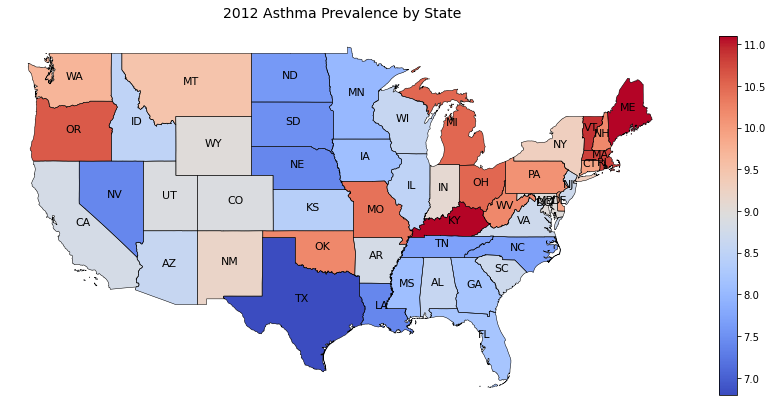

In [20]:
#Code for visualizing maps was modified from author Jonathan Cutrer's GeoPandas Tutorials articles:
#https://jcutrer.com/python/learn-geopandas-plotting-tornados
#https://jcutrer.com/python/learn-geopandas-plotting-usmaps

#plot 2012 map
fig = plt.figure(1, figsize=(15,12)) 
ax = fig.add_subplot()
ax.set_title('2012 Asthma Prevalence by State', fontsize=14)

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

stateMerged.apply(lambda x: ax.annotate(
    text=x['STUSPS'],
    xy=x['geometry'].centroid.coords[0],
    ha='center',
    fontsize=11), axis=1);

ax.set_xlim(-14100244, -7200000)
ax.set_ylim(2600000, 6550000)
ax.set_axis_off()

stateMap.boundary.plot(ax=ax, color = 'black', linewidth=.5)
stateMerged.plot(ax = ax, column='DataValue', cmap = 'coolwarm', legend=True, 
                 legend_kwds={'orientation': "vertical", "shrink": 0.55})

In [21]:
fig.savefig('asthma_byState_map.png')

In [22]:
plt.close()

### Which states have the highest and lowest prevalence of asthma?

In [23]:
#highest
asthma2012Highest = asthma2012Cleaned.sort_values('DataValue', ascending = False).head(10)

asthma2012Highest

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1
26078,2012,2012,ME,Maine,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,11.1,11.1,NaN,NaN,10.3,11.9,Overall,Overall
28646,2012,2012,KY,Kentucky,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,11.1,11.1,NaN,NaN,10.2,12.0,Overall,Overall
32795,2012,2012,VT,Vermont,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,10.9,10.9,NaN,NaN,9.9,12.1,Overall,Overall
23605,2012,2012,MA,Massachusetts,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,10.8,10.8,NaN,NaN,10.2,11.5,Overall,Overall
36314,2012,2012,RI,Rhode Island,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,10.8,10.8,NaN,NaN,9.7,12.0,Overall,Overall
25260,2012,2012,OR,Oregon,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,10.6,10.6,NaN,NaN,9.5,11.8,Overall,Overall
27412,2012,2012,MI,Michigan,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,10.5,10.5,NaN,NaN,9.7,11.4,Overall,Overall
25887,2012,2012,OH,Ohio,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,10.5,10.5,NaN,NaN,9.7,11.2,Overall,Overall
35720,2012,2012,MO,Missouri,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,10.4,10.4,NaN,NaN,9.4,11.5,Overall,Overall
33336,2012,2012,NH,New Hampshire,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,10.2,10.2,NaN,NaN,9.2,11.3,Overall,Overall


In [24]:
#lowest
asthma2012Lowest = asthma2012Cleaned.sort_values('DataValue').head(10)
asthma2012Lowest

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1
31164,2012,2012,TX,Texas,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,6.8,6.8,NaN,NaN,6.1,7.6,Overall,Overall
31996,2012,2012,NE,Nebraska,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,7.4,7.4,NaN,NaN,6.9,7.9,Overall,Overall
34758,2012,2012,NV,Nevada,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,7.4,7.4,NaN,NaN,6.4,8.5,Overall,Overall
32098,2012,2012,LA,Louisiana,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,7.4,7.4,NaN,NaN,6.6,8.3,Overall,Overall
30559,2012,2012,SD,South Dakota,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,7.5,7.5,NaN,NaN,6.6,8.5,Overall,Overall
33351,2012,2012,ND,North Dakota,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,7.6,7.6,NaN,NaN,6.6,8.7,Overall,Overall
25317,2012,2012,NC,North Carolina,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,7.7,7.7,NaN,NaN,7.0,8.4,Overall,Overall
35818,2012,2012,TN,Tennessee,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,7.7,7.7,NaN,NaN,6.8,8.7,Overall,Overall
26385,2012,2012,MN,Minnesota,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,8.0,8.0,NaN,NaN,7.3,8.6,Overall,Overall
37009,2012,2012,IA,Iowa,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,8.1,8.1,NaN,NaN,7.3,9.0,Overall,Overall


In [25]:
asthma2012CleanedSorted = asthma2012Cleaned.sort_values('DataValue', ascending = False)

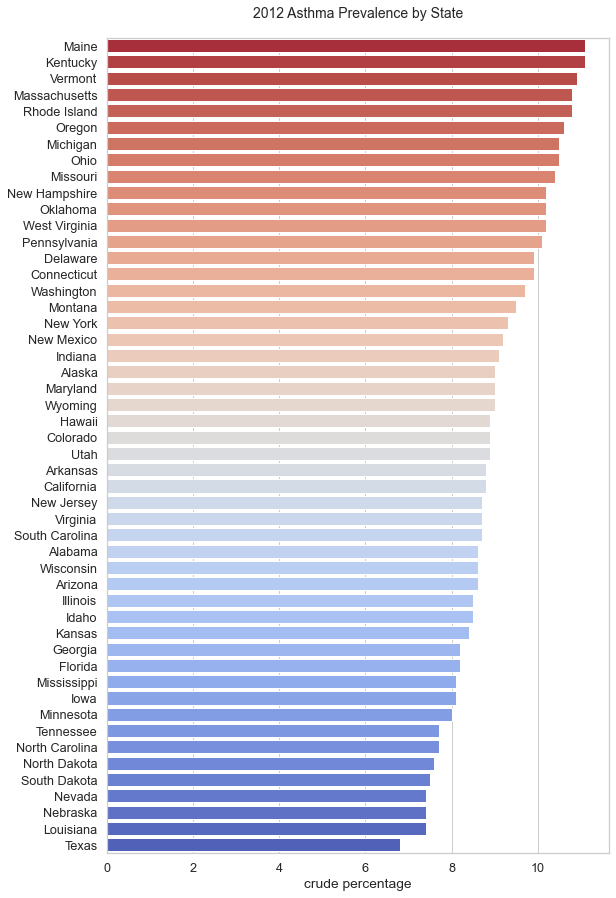

In [26]:
sns.set(style='whitegrid', context='notebook', rc={'figure.figsize': (9,15)}, font_scale=1.15)
sns.barplot(x = asthma2012CleanedSorted['DataValue'], y = asthma2012CleanedSorted['LocationDesc'], palette = 'coolwarm_r')
plt.xlabel('crude percentage')
plt.ylabel('')
plt.title('2012 Asthma Prevalence by State', pad=20, fontsize=14)
plt.savefig('asthma_byState_barchart.png')

In [27]:
plt.close()

In [28]:
#What are summary statistics on the cleaned subset?
asthma2012Cleaned.describe()

,YearStart,YearEnd,Response,DataValue,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit
count,50.0,50.0,0.0,50.000000,50.000000,50.000000,50.000000
mean,2012.0,2012.0,NaN,9.054000,9.054000,8.192000,9.988000
std,0.0,0.0,NaN,1.120716,1.120716,1.107275,1.162973
min,2012.0,2012.0,NaN,6.800000,6.800000,6.100000,7.600000
25%,2012.0,2012.0,NaN,8.250000,8.250000,7.300000,9.200000
50%,2012.0,2012.0,NaN,8.900000,8.900000,7.950000,9.800000
75%,2012.0,2012.0,NaN,10.050000,10.050000,9.175000,10.975000
max,2012.0,2012.0,NaN,11.100000,11.100000,10.300000,12.100000


### Look more closely at Kentucky and Vermont asthma data

In [29]:
vermont = pd.read_csv('C:\\Users\\Mary\\CIS5898\\FIT_capstone\\Original_datasets\\vermont.csv')

In [30]:
print(vermont.info()) #provides basic information on data
print(vermont.ndim) #provides dimensions
print(vermont.shape) #provides number of rows and number of columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Columns: 629 entries, Counties to state.208
dtypes: float64(272), int64(160), object(197)
memory usage: 73.8+ KB
None
2
(15, 629)


In [31]:
vermont.columns

Index(['Counties', 'Name',
       'Percent of Adults with Arthritis(2002, 2003, 2005)', 'countyRate',
       'state', 'Percent of Adults with Arthritis(2003, 2005, 2007)',
       'countyRate.1', 'state.1',
       'Percent of Adults with Arthritis(2005-2007)', 'countyRate.2',
       ...
       'state.205', 'Suicide Death Rate Per 100,000(2011-2013)',
       'countyRate.206', 'state.206',
       'Suicide Death Rate Per 100,000(2012-2014)', 'countyRate.207',
       'state.207', 'Suicide Death Rate Per 100,000(2013-2015)',
       'countyRate.208', 'state.208'],
      dtype='object', length=629)

In [32]:
vermont.head()

,Counties,Name,"Percent of Adults with Arthritis(2002, 2003, 2005)",countyRate,state,"Percent of Adults with Arthritis(2003, 2005, 2007)",countyRate.1,state.1,Percent of Adults with Arthritis(2005-2007),countyRate.2,...,state.205,"Suicide Death Rate Per 100,000(2011-2013)",countyRate.206,state.206,"Suicide Death Rate Per 100,000(2012-2014)",countyRate.207,state.207,"Suicide Death Rate Per 100,000(2013-2015)",countyRate.208,state.208
0,50001,ADDISON,Same,25,27,Same,24,25,Same,27,...,12.7,Same,13.0,16.9,Same,11.5,17.2,Same,8.3,14
1,50003,BENNINGTON,Same,30,27,Worse,31,25,Worse,31,...,12.7,Same,22.0,16.9,Same,18.0,17.2,Same,22.3,14
2,50005,CALEDONIA,Same,30,27,Worse,31,25,Worse,31,...,12.7,Same,19.7,16.9,Same,17.6,17.2,Same,21.9,14
3,50007,CHITTENDEN,Better,21,27,Better,22,25,Better,23,...,12.7,Same,12.5,16.9,Same,12.8,17.2,Same,14.2,14
4,50009,ESSEX,Same,33,27,Worse,36,25,Worse,34,...,12.7,Same,10.5,16.9,Same,10.4,17.2,Same,7.8,14


In [33]:
#search for asthma columns
vermont.iloc[:1, :60]

,Counties,Name,"Percent of Adults with Arthritis(2002, 2003, 2005)",countyRate,state,"Percent of Adults with Arthritis(2003, 2005, 2007)",countyRate.1,state.1,Percent of Adults with Arthritis(2005-2007),countyRate.2,...,Percent of Adults with Asthma(2007-2009),countyRate.16,state.16,Percent of Adults with Asthma(2008-2010),countyRate.17,state.17,Percent of Adults with Asthma(2011-2012),countyRate.18,state.18,Percent of Adults with Asthma(2012-2013)
0,50001,ADDISON,Same,25,27,Same,24,25,Same,27,...,Same,9,10,Same,9,11,Same,10,11,Same


In [34]:
asthmaVermont = vermont[['Counties', 'Name', 'Percent of Adults with Asthma(2011-2012)', 'countyRate.18', 'state.18']]

In [35]:
asthmaVermont.head()

,Counties,Name,Percent of Adults with Asthma(2011-2012),countyRate.18,state.18
0,50001,ADDISON,Same,10,11
1,50003,BENNINGTON,Same,15,11
2,50005,CALEDONIA,Same,10,11
3,50007,CHITTENDEN,Same,11,11
4,50009,ESSEX,Same,10,11


In [36]:
#save cleaned csv
asthmaVermont.to_csv('C:\\Users\\Mary\\CIS5898\\FIT_capstone\\asthmaVermont_cleaned.csv', header = True)

In [37]:
#sort by county
asthmaVermont.sort_values('countyRate.18', ascending = False)

,Counties,Name,Percent of Adults with Asthma(2011-2012),countyRate.18,state.18
1,50003,BENNINGTON,Same,15,11
7,50015,LAMOILLE,Same,14,11
9,50019,ORLEANS,Same,14,11
8,50017,ORANGE,Same,13,11
10,50021,RUTLAND,Same,12,11
3,50007,CHITTENDEN,Same,11,11
5,50011,FRANKLIN,Same,11,11
14,50000,VERMONT,NaN,11,11
0,50001,ADDISON,Same,10,11
2,50005,CALEDONIA,Same,10,11


In [38]:
countyMap = gpd.read_file('C:\\Users\\Mary\\CIS5898\\cb_2014_us_county_5m\\cb_2014_us_county_5m.shp')
countyMap.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,01,059,00161555,0500000US01059,01059,Franklin,06,1641580723,32904833,"POLYGON Z ((-88.16591 34.38093 0.00000, -88.16..."
1,13,111,00351094,0500000US13111,13111,Fannin,06,1002370118,13560697,"POLYGON Z ((-84.62148 34.98833 0.00000, -84.50..."
2,19,109,00465243,0500000US19109,19109,Kossuth,06,2519332669,4154722,"POLYGON Z ((-94.44314 43.25501 0.00000, -94.44..."
3,40,115,01101845,0500000US40115,40115,Ottawa,06,1219467406,35708892,"POLYGON Z ((-95.03412 36.99423 0.00000, -95.00..."
4,42,115,01213688,0500000US42115,42115,Susquehanna,06,2132881515,22356541,"POLYGON Z ((-76.13120 41.99895 0.00000, -76.12..."


In [39]:
#limit the county map to the state of Vermont. 
#Per https://www.nrcs.usda.gov/wps/portal/nrcs/detail/?cid=nrcs143_013696, the STATEFP for Vermont is 50
vermontCountyMap = countyMap[countyMap['STATEFP']== '50']

In [40]:
vermontCountyMap

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
511,50,015,01461764,0500000US50015,50015,Lamoille,06,1188280104,12659523,"POLYGON Z ((-72.92708 44.64501 0.00000, -72.90..."
774,50,009,01461761,0500000US50009,50009,Essex,06,1718717706,30285695,"POLYGON Z ((-71.97432 44.78652 0.00000, -71.92..."
1326,50,021,01461767,0500000US50021,50021,Rutland,06,2408234776,38735238,"POLYGON Z ((-73.43123 43.58828 0.00000, -73.43..."
1768,50,001,01461757,0500000US50001,50001,Addison,06,1984776518,107304306,"POLYGON Z ((-73.43774 44.04501 0.00000, -73.43..."
1881,50,003,01461758,0500000US50003,50003,Bennington,06,1748195212,6930003,"POLYGON Z ((-73.28634 42.80804 0.00000, -73.28..."
2123,50,019,01461766,0500000US50019,50019,Orleans,06,1796364861,71441645,"POLYGON Z ((-72.53264 44.83335 0.00000, -72.53..."
2172,50,023,01461768,0500000US50023,50023,Washington,06,1779936836,21187416,"POLYGON Z ((-72.95217 44.16127 0.00000, -72.89..."
2221,50,017,01461765,0500000US50017,50017,Orange,06,1779409888,13549375,"POLYGON Z ((-72.79134 43.96185 0.00000, -72.74..."
2366,50,005,01461759,0500000US50005,50005,Caledonia,06,1680554036,22457630,"POLYGON Z ((-72.37479 44.58413 0.00000, -72.26..."
2404,50,007,01461760,0500000US50007,50007,Chittenden,06,1389737928,214239771,"POLYGON Z ((-73.36149 44.56352 0.00000, -73.29..."


In [41]:
#merge asthma and vermont shapefile
vermontMerged = pd.merge(vermontCountyMap, asthmaVermont, left_on=vermontCountyMap['NAME'].str.lower(), 
                right_on=asthmaVermont['Name'].str.lower(), how='left')
vermontMerged.head()

,key_0,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,Counties,Name,Percent of Adults with Asthma(2011-2012),countyRate.18,state.18
0,lamoille,50,015,01461764,0500000US50015,50015,Lamoille,06,1188280104,12659523,"POLYGON Z ((-72.92708 44.64501 0.00000, -72.90...",50015,LAMOILLE,Same,14,11
1,essex,50,009,01461761,0500000US50009,50009,Essex,06,1718717706,30285695,"POLYGON Z ((-71.97432 44.78652 0.00000, -71.92...",50009,ESSEX,Same,10,11
2,rutland,50,021,01461767,0500000US50021,50021,Rutland,06,2408234776,38735238,"POLYGON Z ((-73.43123 43.58828 0.00000, -73.43...",50021,RUTLAND,Same,12,11
3,addison,50,001,01461757,0500000US50001,50001,Addison,06,1984776518,107304306,"POLYGON Z ((-73.43774 44.04501 0.00000, -73.43...",50001,ADDISON,Same,10,11
4,bennington,50,003,01461758,0500000US50003,50003,Bennington,06,1748195212,6930003,"POLYGON Z ((-73.28634 42.80804 0.00000, -73.28...",50003,BENNINGTON,Same,15,11


In [42]:
#save this file for future use
#countries_gdf.to_file("countries.shp")
vermontMerged.to_file('C:\\Users\\Mary\\CIS5898\\FIT_capstone\\vermontMerged_gdf.shp')

C:\Users\Mary\AppData\Local\Temp/ipykernel_30004/1717471673.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  vermontMerged.to_file('C:\\Users\\Mary\\CIS5898\\FIT_capstone\\vermontMerged_gdf.shp')


<AxesSubplot:title={'center':'Vermont Asthma Prevalence by County\n 2011-2012'}>

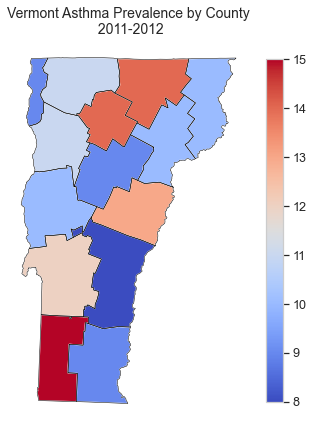

In [43]:
#Code for visualizing maps was modified from author Jonathan Cutrer's GeoPandas Tutorials articles:
#https://jcutrer.com/python/learn-geopandas-plotting-tornados
#https://jcutrer.com/python/learn-geopandas-plotting-usmaps
#plot 2012 map
fig = plt.figure(1, figsize=(7, 7 )) 
ax = fig.add_subplot()
ax.set_title("Vermont Asthma Prevalence by County\n 2011-2012", fontsize=14)
ax.set_axis_off()

vermontCountyMap.boundary.plot(ax=ax, color = 'black', linewidth=.5)
vermontMerged.plot(ax = ax, column='countyRate.18',legend=True,cmap='coolwarm', 
                   legend_kwds={'orientation': "vertical", "shrink": 0.90})

In [44]:
fig.savefig('asthma_Vermont_countymap.png')

In [45]:
plt.close()

In [46]:
vermontMergedSorted = vermontMerged.sort_values('countyRate.18', ascending=False).copy()

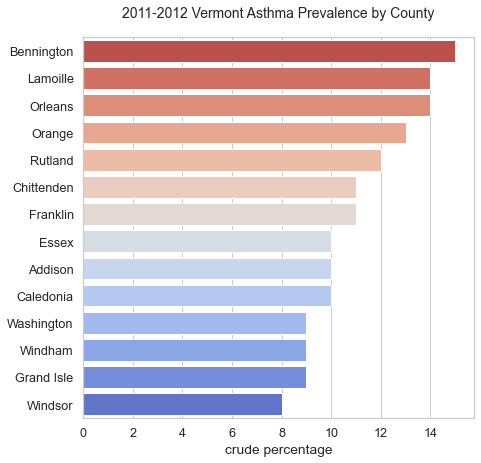

In [47]:
sns.set(style='whitegrid', context='notebook', rc={'figure.figsize': (7,7)}, font_scale=1.15)
sns.barplot(x = vermontMergedSorted['countyRate.18'], y = vermontMergedSorted['NAME'], palette = 'coolwarm_r')
plt.xlabel('crude percentage')
plt.ylabel('')
plt.title('2011-2012 Vermont Asthma Prevalence by County', pad=20, fontsize=14)
plt.savefig('asthma_Vermont_countybarchart.png')

In [48]:
plt.close()

In [49]:
kentucky = pd.read_csv('C:\\Users\\Mary\\CIS5898\\FIT_capstone\\Original_datasets\\Prevalence_of_Asthma__percent_adults_ (2).csv')

In [50]:
print(kentucky.info()) #provides basic information on data
print(kentucky.ndim) #provides dimensions
print(kentucky.shape) #provides number of rows and number of columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Location   238 non-null    object 
 1   BRFSS      238 non-null    object 
 2   TimeFrame  238 non-null    object 
 3   DataType   238 non-null    object 
 4   Data       220 non-null    float64
dtypes: float64(1), object(4)
memory usage: 9.4+ KB
None
2
(238, 5)


In [51]:
kentucky.head()

,Location,BRFSS,TimeFrame,DataType,Data
0,Allen,County,2011-2012,Percent,0.2527
1,Allen,County Group,2011-2012,Percent,0.1532
2,Anderson,County,2011-2012,Percent,0.1845
3,Anderson,County Group,2011-2012,Percent,0.1389
4,Ballard,County,2011-2012,Percent,0.1219


In [52]:
#remove county groups
asthmaKentucky = kentucky[kentucky['BRFSS']!= 'County Group'].copy()
asthmaKentucky.head()

,Location,BRFSS,TimeFrame,DataType,Data
0,Allen,County,2011-2012,Percent,0.2527
2,Anderson,County,2011-2012,Percent,0.1845
4,Ballard,County,2011-2012,Percent,0.1219
6,Barren,County,2011-2012,Percent,0.1120
8,Bath,County,2011-2012,Percent,0.1294


In [53]:
#multiply the Data column values by 100
asthmaKentucky.iloc[:,4] *= 100

In [54]:
asthmaKentucky.head()

,Location,BRFSS,TimeFrame,DataType,Data
0,Allen,County,2011-2012,Percent,25.27
2,Anderson,County,2011-2012,Percent,18.45
4,Ballard,County,2011-2012,Percent,12.19
6,Barren,County,2011-2012,Percent,11.20
8,Bath,County,2011-2012,Percent,12.94


In [55]:
asthmaKentucky.iloc[:,4] = asthmaKentucky.iloc[:,4].round(1)

In [56]:
asthmaKentucky.head()

,Location,BRFSS,TimeFrame,DataType,Data
0,Allen,County,2011-2012,Percent,25.3
2,Anderson,County,2011-2012,Percent,18.4
4,Ballard,County,2011-2012,Percent,12.2
6,Barren,County,2011-2012,Percent,11.2
8,Bath,County,2011-2012,Percent,12.9


In [57]:
len(asthmaKentucky)

119

In [58]:
#save cleaned csv
asthmaKentucky.to_csv('C:\\Users\\Mary\\CIS5898\\FIT_capstone\\asthmaKentucky_cleaned.csv', header = True)

In [59]:
#limit the county map to the state of Kentucky. 
#Per https://www.nrcs.usda.gov/wps/portal/nrcs/detail/?cid=nrcs143_013696, the STATEFP for Kentucky is 21
kentuckyCountyMap = countyMap[countyMap['STATEFP']== '21']

In [60]:
kentuckyCountyMap

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
35,21,057,00516875,0500000US21057,21057,Cumberland,06,790416941,14830095,"POLYGON Z ((-85.60162 36.87220 0.00000, -85.58..."
59,21,171,00516932,0500000US21171,21171,Monroe,06,853073327,6949354,"POLYGON Z ((-85.97691 36.72272 0.00000, -85.80..."
102,21,061,00516877,0500000US21061,21061,Edmonson,06,784464286,13262147,"POLYGON Z ((-86.46913 37.32110 0.00000, -86.20..."
149,21,191,00516942,0500000US21191,21191,Pendleton,06,717838676,12325364,"POLYGON Z ((-84.53229 38.79194 0.00000, -84.42..."
179,21,083,00516888,0500000US21083,21083,Graves,06,1429026325,13047294,"POLYGON Z ((-88.81724 36.76775 0.00000, -88.81..."
...,...,...,...,...,...,...,...,...,...,...
3134,21,049,00516871,0500000US21049,21049,Clark,06,653878141,6973069,"POLYGON Z ((-84.34334 37.91926 0.00000, -84.33..."
3142,21,045,00516869,0500000US21045,21045,Casey,06,1150557971,3892645,"POLYGON Z ((-85.13124 37.36506 0.00000, -85.13..."
3161,21,215,00516954,0500000US21215,21215,Spencer,06,483493839,12896789,"POLYGON Z ((-85.51688 38.01127 0.00000, -85.46..."
3183,21,105,00516899,0500000US21105,21105,Hickman,06,627487985,27882281,"POLYGON Z ((-89.20105 36.72577 0.00000, -89.19..."


In [61]:
#merge asthma and kentucky shapefile
kentuckyMerged = pd.merge(kentuckyCountyMap, asthmaKentucky, left_on=kentuckyCountyMap['NAME'], 
                right_on=asthmaKentucky['Location'], how='left')
kentuckyMerged.head()

,key_0,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,Location,BRFSS,TimeFrame,DataType,Data
0,Cumberland,21,057,00516875,0500000US21057,21057,Cumberland,06,790416941,14830095,"POLYGON Z ((-85.60162 36.87220 0.00000, -85.58...",Cumberland,County,2011-2012,Percent,NaN
1,Monroe,21,171,00516932,0500000US21171,21171,Monroe,06,853073327,6949354,"POLYGON Z ((-85.97691 36.72272 0.00000, -85.80...",Monroe,County,2011-2012,Percent,12.0
2,Edmonson,21,061,00516877,0500000US21061,21061,Edmonson,06,784464286,13262147,"POLYGON Z ((-86.46913 37.32110 0.00000, -86.20...",Edmonson,County,2011-2012,Percent,18.2
3,Pendleton,21,191,00516942,0500000US21191,21191,Pendleton,06,717838676,12325364,"POLYGON Z ((-84.53229 38.79194 0.00000, -84.42...",Pendleton,County,2011-2012,Percent,4.8
4,Graves,21,083,00516888,0500000US21083,21083,Graves,06,1429026325,13047294,"POLYGON Z ((-88.81724 36.76775 0.00000, -88.81...",Graves,County,2011-2012,Percent,13.7


In [62]:
#save this file for future use
#countries_gdf.to_file("countries.shp")
kentuckyMerged.to_file('C:\\Users\\Mary\\CIS5898\\FIT_capstone\\kentuckyMerged_gdf.shp')

<AxesSubplot:title={'center':'Kentucky Asthma Prevalence by County\n 2011-2012'}>

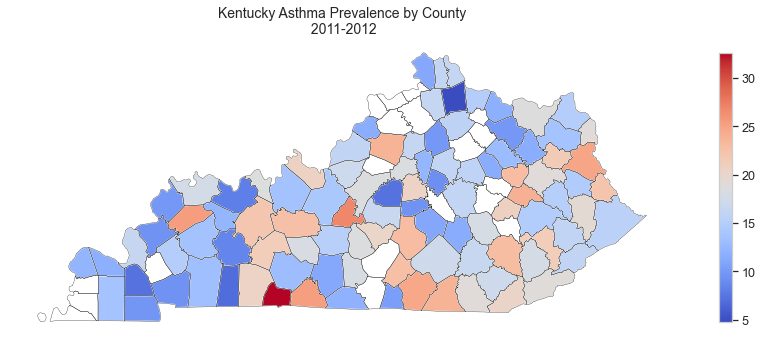

In [63]:
#Code for visualizing maps was modified from author Jonathan Cutrer's GeoPandas Tutorials articles:
#https://jcutrer.com/python/learn-geopandas-plotting-tornados
#https://jcutrer.com/python/learn-geopandas-plotting-usmaps

#plot 2012 map
fig = plt.figure(1, figsize=(15, 9)) 
ax = fig.add_subplot()
ax.set_title('Kentucky Asthma Prevalence by County\n 2011-2012', fontsize=14)
ax.set_axis_off()

kentuckyCountyMap.boundary.plot(ax=ax, color = 'black', linewidth=.3)
kentuckyMerged.plot(ax = ax, column='Data', legend=True, cmap='coolwarm', 
                    legend_kwds={'orientation': 'vertical',"shrink": 0.55})

In [64]:
fig.savefig('asthma_Kentucky_countymap.png')

In [65]:
plt.close()

In [66]:
kentuckyMergedSorted = kentuckyMerged.sort_values('Data', ascending=False).copy()

In [67]:
kentuckyMergedSorted.head()

,key_0,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,Location,BRFSS,TimeFrame,DataType,Data
113,Simpson,21,213,00516953,0500000US21213,21213,Simpson,06,606584287,5857137,"POLYGON Z ((-86.76329 36.64891 0.00000, -86.75...",Simpson,County,2011-2012,Percent,32.6
54,Larue,21,123,00516908,0500000US21123,21123,Larue,06,677353871,5448095,"POLYGON Z ((-85.89442 37.47237 0.00000, -85.87...",Larue,County,2011-2012,Percent,26.8
10,Webster,21,233,00516963,0500000US21233,21233,Webster,06,859730052,9613009,"POLYGON Z ((-87.94396 37.46522 0.00000, -87.93...",Webster,County,2011-2012,Percent,25.4
71,Allen,21,003,00516848,0500000US21003,21003,Allen,06,891830500,19492413,"POLYGON Z ((-86.41889 36.67603 0.00000, -86.40...",Allen,County,2011-2012,Percent,25.3
84,Lawrence,21,127,00516910,0500000US21127,21127,Lawrence,06,1076386415,11584566,"POLYGON Z ((-83.02211 38.00705 0.00000, -83.00...",Lawrence,County,2011-2012,Percent,24.8


In [68]:
len(kentuckyMergedSorted)

120

In [69]:
kentuckyMergedSortedNoMissing = kentuckyMergedSorted.dropna(subset=['Data']).copy()

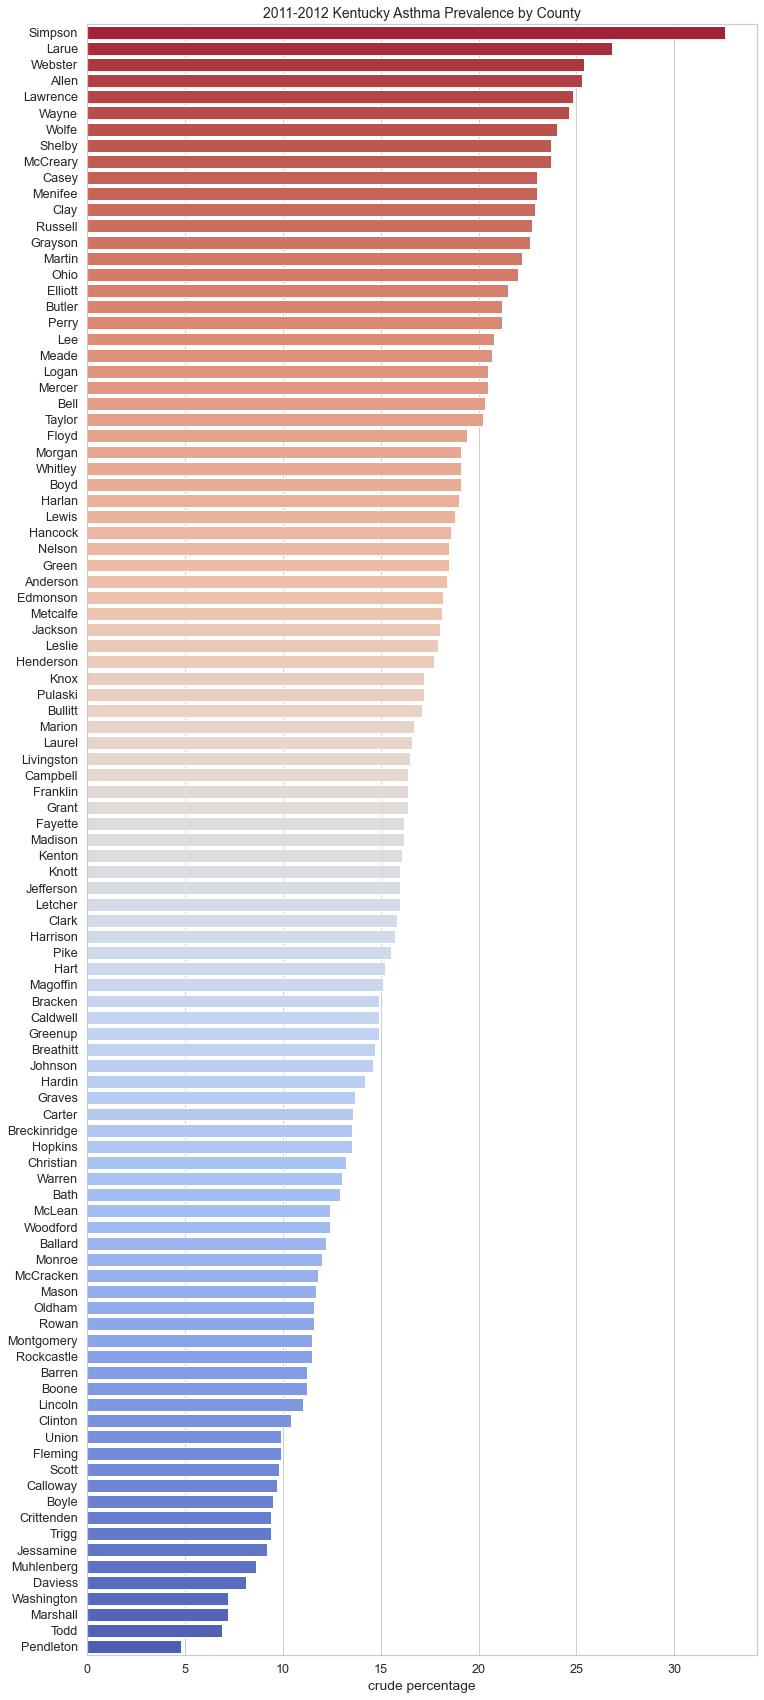

In [70]:
sns.set(style='whitegrid', context='notebook', rc={'figure.figsize': (12,30)}, font_scale=1.15)
sns.barplot(x = kentuckyMergedSortedNoMissing['Data'], y = kentuckyMergedSortedNoMissing['NAME'], palette = 'coolwarm_r')
plt.xlabel('crude percentage')
plt.ylabel('')
plt.title('2011-2012 Kentucky Asthma Prevalence by County', fontsize=14)
plt.savefig('asthma_Kentucky_countybarchart.png')

In [71]:
plt.close()

### End Asthma Studies